In [4]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
# read csv to df
dataframe = pd.read_csv('df_apending_adenied_for_learning.csv')

## Describng the data

In [6]:
print('dataset lenth =' , len(dataframe))


dataset lenth = 1860


In [7]:
# print shape of dataset with rows and columns
print ('dataset shape =', dataframe.shape)

dataset shape = (1860, 12)


In [8]:
# print head
print(dataframe.head())

   Unnamed: 0  NumberOfTerms  Accepted  MonthlyCost  Selected  CreditScore  \
0           8           60.0      True       282.96      True        799.0   
1          41          120.0      True       190.78      True       1020.0   
2          74           78.0      True       225.00      True        883.0   
3         107           60.0      True       281.65      True        994.0   
4         140          110.0      True       202.53      True        967.0   

   OfferedAmount           case:LoanGoal case:ApplicationType  \
0        15000.0                     Car           New credit   
1        18000.0  Other, see explanation           New credit   
2        15000.0  Other, see explanation           New credit   
3        15000.0        Home improvement           New credit   
4        18000.0        Home improvement           New credit   

        case:concept:name  case:RequestedAmount     target  
0   Application_619403287               15000.0  A_Pending  
1  Application_115

In [9]:
# drop unnamed: 0 column
dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# print head
print(dataframe.head())

   NumberOfTerms  Accepted  MonthlyCost  Selected  CreditScore  OfferedAmount  \
0           60.0      True       282.96      True        799.0        15000.0   
1          120.0      True       190.78      True       1020.0        18000.0   
2           78.0      True       225.00      True        883.0        15000.0   
3           60.0      True       281.65      True        994.0        15000.0   
4          110.0      True       202.53      True        967.0        18000.0   

            case:LoanGoal case:ApplicationType       case:concept:name  \
0                     Car           New credit   Application_619403287   
1  Other, see explanation           New credit  Application_1159615731   
2  Other, see explanation           New credit   Application_327715289   
3        Home improvement           New credit   Application_241855451   
4        Home improvement           New credit   Application_702518958   

   case:RequestedAmount     target  
0               15000.0  A_Pend

In [11]:
# move 'case:concept:name' to the beginning of the dataframe
df = dataframe


In [12]:
cols = df.columns.tolist()
cols

['NumberOfTerms',
 'Accepted',
 'MonthlyCost',
 'Selected',
 'CreditScore',
 'OfferedAmount',
 'case:LoanGoal',
 'case:ApplicationType',
 'case:concept:name',
 'case:RequestedAmount',
 'target']

In [13]:
cols = cols[-3:-2] + cols[:-3] + cols[-2:-1] + cols[-1:]

In [14]:
# reorder
df = df[cols]

In [15]:
print(df.head())


        case:concept:name  NumberOfTerms  Accepted  MonthlyCost  Selected  \
0   Application_619403287           60.0      True       282.96      True   
1  Application_1159615731          120.0      True       190.78      True   
2   Application_327715289           78.0      True       225.00      True   
3   Application_241855451           60.0      True       281.65      True   
4   Application_702518958          110.0      True       202.53      True   

   CreditScore  OfferedAmount           case:LoanGoal case:ApplicationType  \
0        799.0        15000.0                     Car           New credit   
1       1020.0        18000.0  Other, see explanation           New credit   
2        883.0        15000.0  Other, see explanation           New credit   
3        994.0        15000.0        Home improvement           New credit   
4        967.0        18000.0        Home improvement           New credit   

   case:RequestedAmount     target  
0               15000.0  A_Pend

In [16]:
df.shape

(1860, 11)

In [18]:
# check for null values
print(df.isnull().sum())

case:concept:name       0
NumberOfTerms           0
Accepted                0
MonthlyCost             0
Selected                0
CreditScore             0
OfferedAmount           0
case:LoanGoal           0
case:ApplicationType    0
case:RequestedAmount    0
target                  0
dtype: int64


In [19]:
# check for duplicates
print(df.duplicated().sum())


0


In [34]:
# show dtypes
print(df.dtypes)

case:concept:name        object
NumberOfTerms           float64
Accepted                   bool
MonthlyCost             float64
CreditScore             float64
OfferedAmount           float64
case:LoanGoal            object
case:RequestedAmount    float64
target                   object
dtype: object


In [35]:
# give unique values for each column besides the case:concept:name, case:RequestedAmount, NumberOfTerms, MonthlyCost
col = df.columns.tolist()
for col in df.columns:
    print(col, df[col].nunique())

case:concept:name 1860
NumberOfTerms 116
Accepted 2
MonthlyCost 604
CreditScore 358
OfferedAmount 137
case:LoanGoal 3
case:RequestedAmount 118
target 2


In [37]:
# print columns df
print(df.columns)
print(len(df.columns))

Index(['case:concept:name', 'NumberOfTerms', 'Accepted', 'MonthlyCost',
       'CreditScore', 'OfferedAmount', 'case:LoanGoal', 'case:RequestedAmount',
       'target'],
      dtype='object')
9


In [33]:
df.drop(columns = ['Selected', 'case:Application'])

KeyError: "['case:ApplicationType'] not found in axis"

In [30]:
df.drop('Selected', axis=1, inplace=True)

/var/folders/b0/0r1m7mv52s32g8p8496ppspw0000gn/T/ipykernel_23929/3587610683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Selected', axis=1, inplace=True)


## replace values with dicts


### column: 'Accepted'

In [43]:
# print unique values
acc = df['Accepted'].unique()
accL = acc.tolist()
print(accL)

[True, False]


In [51]:

# creating dict Accepted
accDict = {'Accepted': {'true': 1, 'false': 0}}

### column: 'LoanGoal'

In [45]:
# print unique values
lg = df['case:LoanGoal'].unique()
lgL = lg.tolist()
print(lgL)

['Car', 'Other, see explanation', 'Home improvement']


In [48]:
# creating dict LoanGoal
lgdicc = {'case:LoanGoal': {'Home improvement': 1, 'Car': 2, 'Other, see explanation': 3}}

In [49]:
print(lgdicc)

{'case:LoanGoal': {'Home improvement': 1, 'Car': 2, 'Other, see explanation': 3}}


### column: replace values with dicts


In [72]:
# replace values with dicts
df = df.replace('True', 1)
df = df.replace('False', 0)
df = df.replace('Car', 1)
df = df.replace('Home improvement', 2)
df = df.replace('Other, see explanation', 3)

In [73]:
print(df.head())

        case:concept:name  NumberOfTerms  Accepted  MonthlyCost  CreditScore  \
0   Application_619403287           60.0         1       282.96        799.0   
1  Application_1159615731          120.0         1       190.78       1020.0   
2   Application_327715289           78.0         1       225.00        883.0   
3   Application_241855451           60.0         1       281.65        994.0   
4   Application_702518958          110.0         1       202.53        967.0   

   OfferedAmount  case:LoanGoal  case:RequestedAmount     target  
0        15000.0              1               15000.0  A_Pending  
1        18000.0              3               18000.0  A_Pending  
2        15000.0              3               15000.0  A_Pending  
3        15000.0              2               15000.0  A_Pending  
4        18000.0              2               18000.0  A_Pending  


## Training the model

In [78]:
# seperating targert variable
X = df.drop(columns=['target','case:concept:name'])
Y = df['target']
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
#fuction to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=2, min_samples_leaf=3)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       random_state=100)

In [79]:
# function to make predictions
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['A_Denied', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
  

In [80]:
# check accuracy
print('Accuracy is:', accuracy_score(Y_test, y_pred_en)*100)

Accuracy is: 100.0


## Training 2

In [81]:
df2 = df.drop(columns=['case:concept:name', 'case:LoanGoal', 'Accepted'])


In [84]:
df2.head()

,NumberOfTerms,MonthlyCost,CreditScore,OfferedAmount,case:RequestedAmount,target
0,60.0,282.96,799.0,15000.0,15000.0,A_Pending
1,120.0,190.78,1020.0,18000.0,18000.0,A_Pending
2,78.0,225.00,883.0,15000.0,15000.0,A_Pending
3,60.0,281.65,994.0,15000.0,15000.0,A_Pending
4,110.0,202.53,967.0,18000.0,18000.0,A_Pending


In [93]:
# seperating targert variable
X2 = df2.drop(columns=['target'])
Y2 = df2['target']
# split data into train and test
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=100, shuffle=True)
#fuction to perform training with entropy
clf_entropy2 = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=2, min_samples_leaf=3)
clf_entropy2.fit(X_train2, Y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       random_state=100)

In [108]:
# turn Y_train and Y_test into dataframes
Y_train_df = pd.DataFrame(Y_train)
Y_test_df = pd.DataFrame(Y_test)
#name columns target
Y_train_df.columns = ['target']
Y_test_df.columns = ['target']
# give i
Y_train_count = Y_train_df.groupby('target').size()


In [109]:
print(Y_train_count)

target
A_Denied     319
A_Pending    983
dtype: int64


In [96]:
# lenght of X_train2 and X_test2
print(len(X_train2))
print(len(X_test2))


1302
558


In [106]:
# turn Y_train2 and Y_test2 into dataframes
Y_train2_df = pd.DataFrame(Y_train2)
Y_test2_df = pd.DataFrame(Y_test2)
#name columns target
Y_train2_df.columns = ['target']
Y_test2_df.columns = ['target']
# give i
Y_train2_count = Y_train2_df.groupby('target').size()

In [107]:
print(Y_train2_count)

target
A_Denied     319
A_Pending    983
dtype: int64


In [94]:
# function to make predictions
y_pred_en2 = clf_entropy2.predict(X_test2)
y_pred_en2

array(['A_Denied', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
  

In [95]:
# check accuracy
print('Accuracy is:', accuracy_score(Y_test2, y_pred_en2)*100)

Accuracy is: 100.0


[Text(0.5, 0.75, 'x[2] <= 311.5\nentropy = 0.803\nsamples = 1302\nvalue = [319, 983]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 319\nvalue = [319, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 983\nvalue = [0, 983]')]

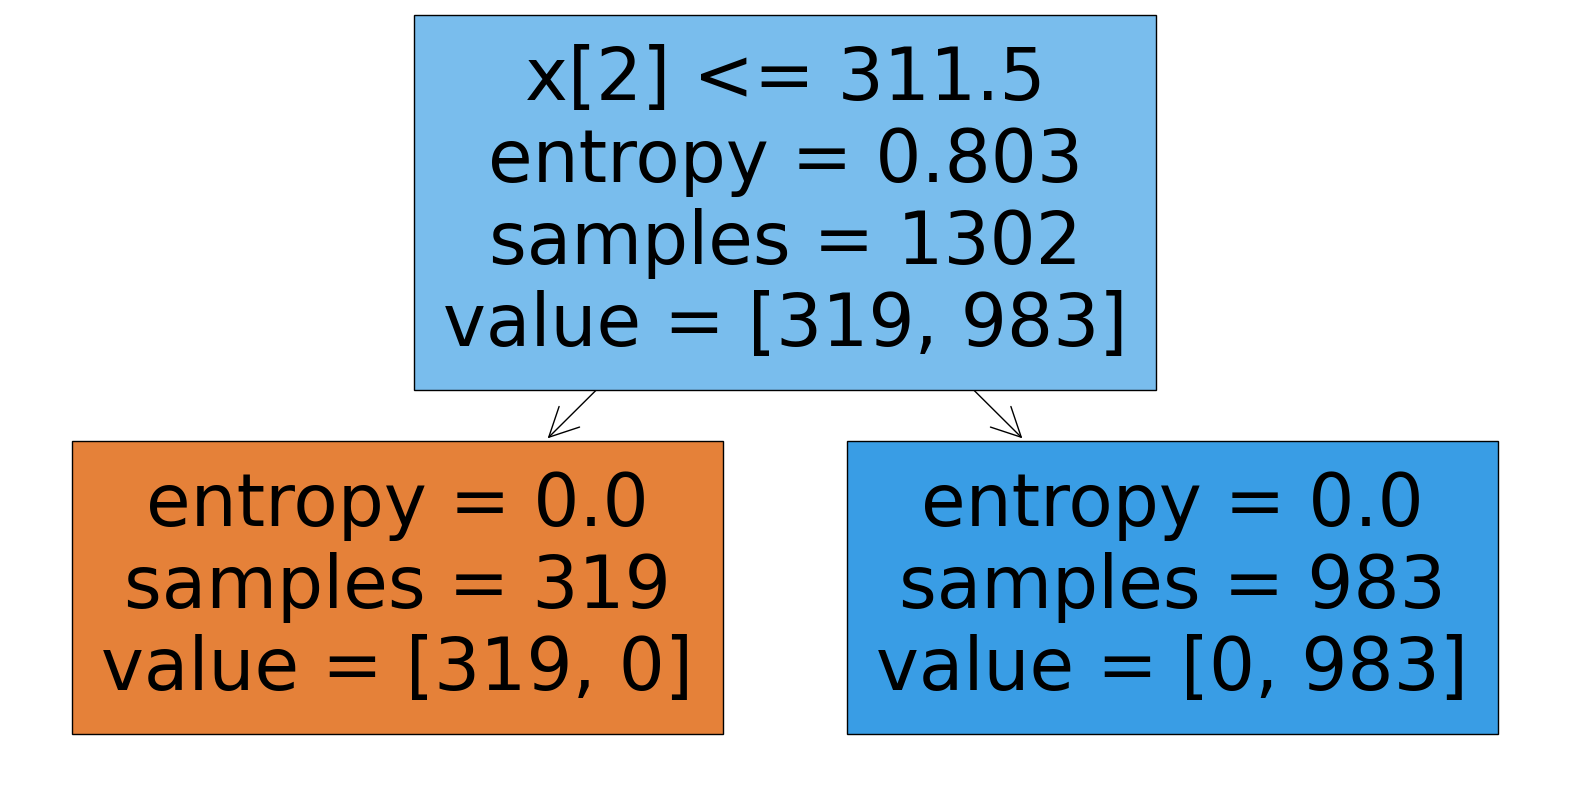

In [110]:
# visualize tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy2, filled=True)

## Training 3

In [111]:
# seperating targert variable
X3 = df.drop(columns=['target','case:concept:name'])
Y3 = df['target']
# split data into train and test
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=100, shuffle=True)
#fuction to perform training
clf_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
clf_3.fit(X_train3, Y_train3)




DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [116]:
# print head of X_train3
print(X_train3.head())

     NumberOfTerms  Accepted  MonthlyCost  CreditScore  OfferedAmount  \
526           60.0         1       191.27       1076.0        10000.0   
819           51.0         0       200.00       1036.0         9000.0   
344           67.0         1       150.87       1048.0         8500.0   
734           60.0         1       278.38       1001.0        15000.0   
962           36.0         1       152.82       1058.0         5000.0   

     case:LoanGoal  case:RequestedAmount  
526              1               10000.0  
819              2                9000.0  
344              1                8500.0  
734              1               15000.0  
962              1                5000.0  


In [112]:
# function to make predictions
y_pred_3 = clf_3.predict(X_test3)
y_pred_3

array(['A_Denied', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Denied', 'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
  

In [113]:
# check accuracy
print('Accuracy is:', accuracy_score(Y_test3, y_pred_3)*100)

Accuracy is: 100.0


[Text(0.5, 0.75, 'CreditScore <= 311.5\ngini = 0.37\nsamples = 1302\nvalue = [319, 983]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 319\nvalue = [319, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 983\nvalue = [0, 983]')]

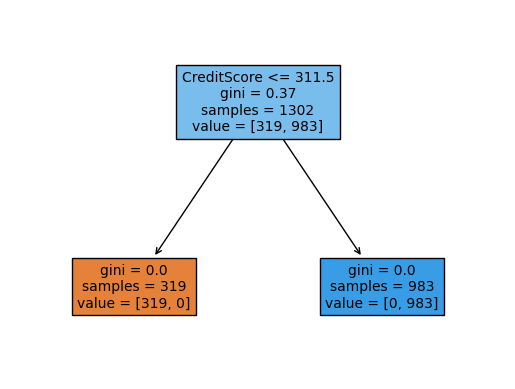

In [117]:
tree.plot_tree(clf_3, filled=True, fontsize=10, feature_names=X3.columns)

## Training 4

In [118]:
# seperating targert variable
X4 = df.drop(columns=['target','case:concept:name', 'CreditScore'])
Y4 = df['target']
# split data into train and test
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size=0.3, random_state=100, shuffle=True)
#fuction to perform training
clf_4 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
clf_4.fit(X_train4, Y_train4)



DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [120]:
# function to make predictions
y_pred_4 = clf_4.predict(X_test4)
y_pred_4

array(['A_Denied', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Denied',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Denied', 'A_Denied', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Denied',
       'A_Pending', 'A_Denied', 'A_Denied', 'A_Denied', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Denied', 'A_Pending',
       'A_Denied', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
       'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending', 'A_Pending',
    

In [121]:
# check accuracy
print('Accuracy is:', accuracy_score(Y_test4, y_pred_4)*100)


Accuracy is: 81.72043010752688


[Text(0.5, 0.875, 'Accepted <= 0.5\ngini = 0.37\nsamples = 1302\nvalue = [319, 983]'),
 Text(0.25, 0.625, 'NumberOfTerms <= 47.5\ngini = 0.47\nsamples = 324\nvalue = [202, 122]'),
 Text(0.125, 0.375, 'MonthlyCost <= 223.655\ngini = 0.5\nsamples = 145\nvalue = [71, 74]'),
 Text(0.0625, 0.125, 'gini = 0.476\nsamples = 69\nvalue = [42, 27]'),
 Text(0.1875, 0.125, 'gini = 0.472\nsamples = 76\nvalue = [29, 47]'),
 Text(0.375, 0.375, 'OfferedAmount <= 6750.0\ngini = 0.392\nsamples = 179\nvalue = [131, 48]'),
 Text(0.3125, 0.125, 'gini = 0.21\nsamples = 42\nvalue = [37, 5]'),
 Text(0.4375, 0.125, 'gini = 0.431\nsamples = 137\nvalue = [94, 43]'),
 Text(0.75, 0.625, 'MonthlyCost <= 728.52\ngini = 0.211\nsamples = 978\nvalue = [117, 861]'),
 Text(0.625, 0.375, 'case:RequestedAmount <= 9750.0\ngini = 0.202\nsamples = 965\nvalue = [110, 855]'),
 Text(0.5625, 0.125, 'gini = 0.264\nsamples = 339\nvalue = [53, 286]'),
 Text(0.6875, 0.125, 'gini = 0.166\nsamples = 626\nvalue = [57, 569]'),
 Text(0.875

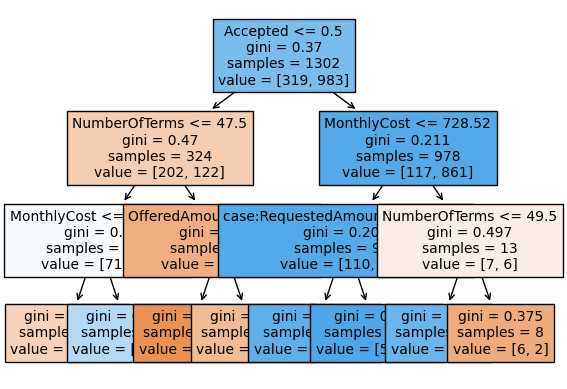

In [123]:
# visualize tree
tree.plot_tree(clf_4, filled=True, fontsize=10, feature_names=X4.columns)

## Training 5
